In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
#circuit = QuantumCircuit(6+1, 6)
secretNumber = input('Enter secret number: ')

Enter secret number: 100011


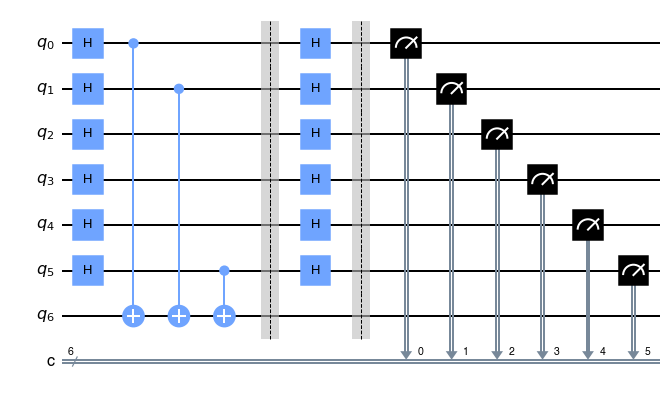

In [10]:
num_length = len(secretNumber)
circuit = QuantumCircuit(num_length+1, num_length)
#circuit.h([0,1,2,3,4,5])
circuit.h(range(num_length))
circuit.x(num_length)
circuit.h(num_length)
#circuit.barrier()

# for every one bit, put CX-gate (from the last qubit to the front qubit)
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)
for ii, yesno in enumerate(reversed(secretNumber)):
    if yesno == '1':
        circuit.cx(ii, num_length)
circuit.barrier()

circuit.h([0,1,2,3,4,5])
#circuit.h(range(num_length))
circuit.barrier()

#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(num_length), range(num_length))
circuit.draw('mpl')

In [11]:
simulator = QasmSimulator()
result = simulator.run(circuit, shots = 1024).result()
counts = result.get_counts()
print(counts)

{'100011': 544, '000000': 480}
